# Used Car Sales Dataset - Pandas, MatPlotLib, and Seaborn

## You can scroll down to skip directly to the visualizations that were made. If you would like to read the code, there are markdowns explaining it.

### Note: This notebook was created to act as a showcase of my skills, not as a practical or serious project meant to provide real insights into the car market. A lot of data was removed during pre-processing.

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


#### Importing dataset

In [32]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

#### First look

In [33]:
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [34]:
df.shape

(558837, 16)

In [35]:
df.year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

#### Deleting all duplicate rows in the dataset

In [36]:
df.drop_duplicates()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#### Checking null values

In [37]:
null_counts = df.isna().sum()
print(null_counts)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


#### A lot of transmission values are null, therefore removing the whole column

In [38]:
df = df.drop(columns = 'transmission')

#### Now we can remove all the null rows. Doing this before would also delete all the records with null transmission inputs

In [39]:
cl_df = df.dropna()

In [ ]:
null_counts1 = cl_df.isna().sum()
print(null_counts1)

#### Dropping other columns not necessary for analysis

In [40]:
df2 = cl_df.drop(columns = ['vin', 'trim', 'seller', 'mmr'])

In [41]:
df2.head(3)

,year,make,model,body,state,condition,odometer,color,interior,sellingprice,saledate
0,2015,Kia,Sorento,SUV,ca,5.0,16639.0,white,black,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,ca,5.0,9393.0,white,beige,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,ca,45.0,1331.0,gray,black,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [42]:
df2.dtypes

year              int64
make             object
model            object
body             object
state            object
condition       float64
odometer        float64
color            object
interior         object
sellingprice    float64
saledate         object
dtype: object

#### Converting 'saledate' column into something more useable for analysis. The time and timezone are irrelevant.

In [43]:
df2['saledate'] = df2['saledate'].str.slice(start=0, stop=-18) #removes last 18 characters from the string

In [44]:
df2.head(3)

,year,make,model,body,state,condition,odometer,color,interior,sellingprice,saledate
0,2015,Kia,Sorento,SUV,ca,5.0,16639.0,white,black,21500.0,Tue Dec 16 2014 12:30
1,2015,Kia,Sorento,SUV,ca,5.0,9393.0,white,beige,21500.0,Tue Dec 16 2014 12:30
2,2014,BMW,3 Series,Sedan,ca,45.0,1331.0,gray,black,30000.0,Thu Jan 15 2015 04:30


#### Now converting 'saledate' into a datetime column, allowing us to use the dates more flexibly.

In [45]:
df2['saledate'] = pd.to_datetime(df2['saledate'], format='%a %b %d %Y %H:%M', errors='coerce')
df2['saledate'] = df2['saledate'].dt.date

In [46]:
df2.head(3)

,year,make,model,body,state,condition,odometer,color,interior,sellingprice,saledate
0,2015,Kia,Sorento,SUV,ca,5.0,16639.0,white,black,21500.0,2014-12-16
1,2015,Kia,Sorento,SUV,ca,5.0,9393.0,white,beige,21500.0,2014-12-16
2,2014,BMW,3 Series,Sedan,ca,45.0,1331.0,gray,black,30000.0,2015-01-15


#### First visualization is the frequency of cars bought distributed over the selling price. Approximately $7,000 is the most frequent purchase price for used cars.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


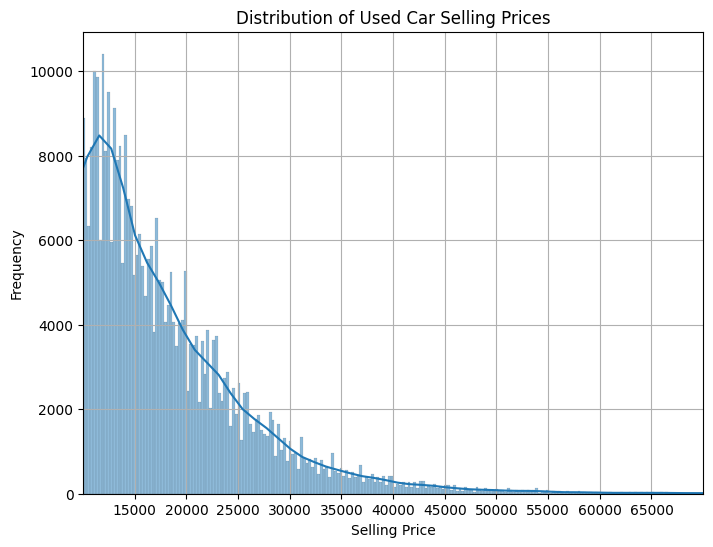

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Used Car Selling Prices')
plt.xlabel('Selling Price')
plt.xticks(range(15000, 70000, 5000))
plt.xlim(10000, 70000)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### The second visualization is a pie chart representing the sales share of each car maker in this dataset. The code below first counts the number of sales for each car make and calculates a percentage. Then, a 'threshold' of 4% is set (by me to not overcrowd the chart). The 'mask' returns a value of either true or false based on whether the percentages meet the threshold. The 'tail' variable is to flip the true\false. This will be handy when adding up the percentages of all the true (previously false, i.e. the values below 4%) values. Then, the 'make_percentages' variable is reassigned to the 'mask' variable and the 'tail' variable is summed up into the 'Others' category. The next piece of code just makes sure there are indeed values below 4% (did this in case I need to copy this code for later use) and makes the 'Others' category equal to 'tail.sum' once again. We get the following chart which shows that Ford is the leader closely followed by Chevrolet.

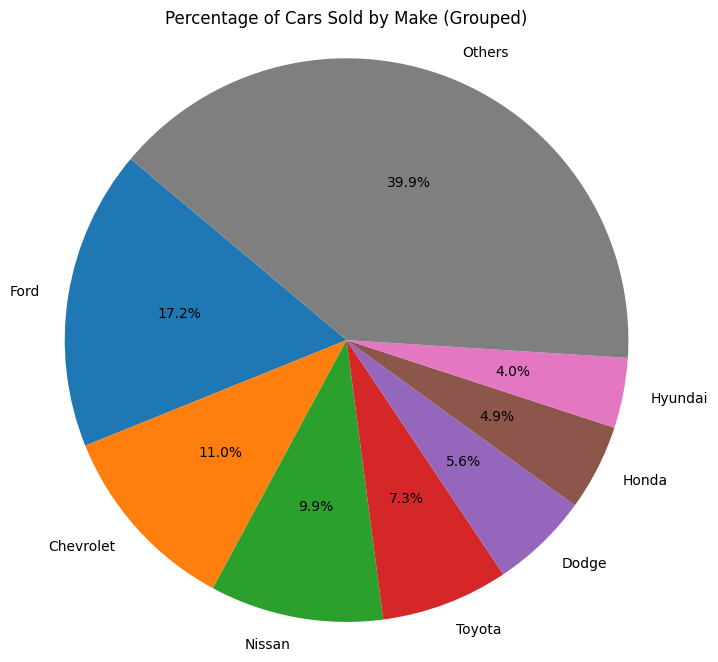

In [48]:
make_counts2 = df2['make'].value_counts()
make_percentages = make_counts2 / make_counts2.sum() * 100

threshold = 4
mask = make_percentages > threshold
tail = make_percentages.loc[~mask]
make_percentages = make_percentages.loc[mask]
make_percentages['Others'] = tail.sum()

if tail.sum() > 0:
    make_percentages['Others'] = tail.sum()

labels = make_percentages.index
sizes = make_percentages.values
plt.figure(figsize=(8, 8))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Cars Sold by Make (Grouped)')
plt.axis('equal')  
plt.show()

#### The next visualization is the average selling price of each car maker. This code is similar to the one before but a little bit simpler. This first creates an 'average_prices' variable which groups makes by their respective average selling prices. I once again added a threshold to not overcrowd the chart. This time, there are two simple variables, either above or below the set threshold, and an if statement. The if statement creates the 'Others' column if the 'below_threshold' variable is not empty and sets it to the average of the average prices of car makers below the $20,000 threshold. This provides us with the following chart and we can be confident that it's accurate due to all present car makers being considered luxury.

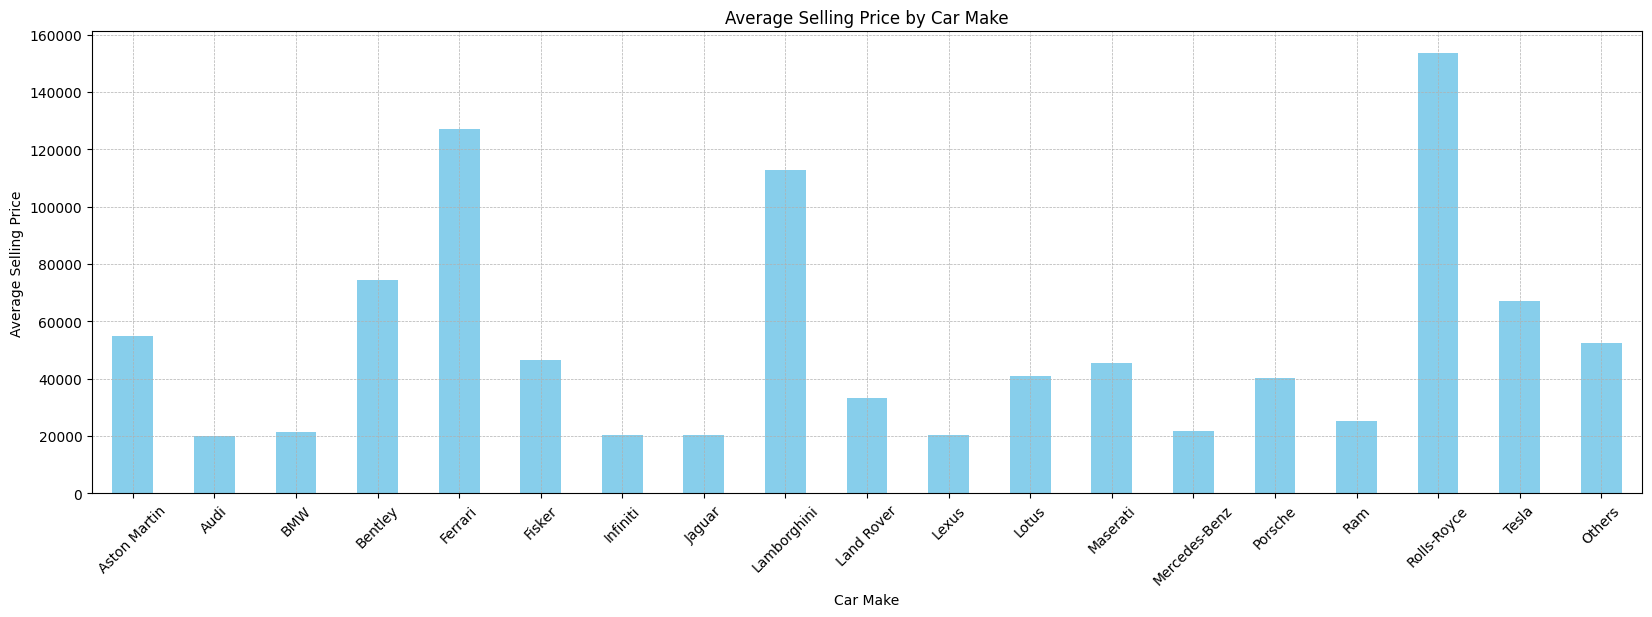

In [49]:
average_prices = df2.groupby('make')['sellingprice'].mean()

threshold = 20000

above_threshold = average_prices[average_prices >= threshold]
below_threshold = average_prices[average_prices < threshold]

if not below_threshold.empty:
    above_threshold['Others'] = above_threshold.mean()

final_prices = above_threshold

plt.figure(figsize=(20, 6))  
final_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Selling Price by Car Make')  
plt.xlabel('Car Make')  
plt.ylabel('Average Selling Price')  
plt.xticks(rotation=45)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.show() 

#### The last visualization is the average price of cars month-over-month from 2014 to 2015 based on available data. It simply groups the data by the average selling price of each month after converting the 'saledate' column into a month column. By the looks of it, from May to August, the car prices were on an uptrend after a significant drop.

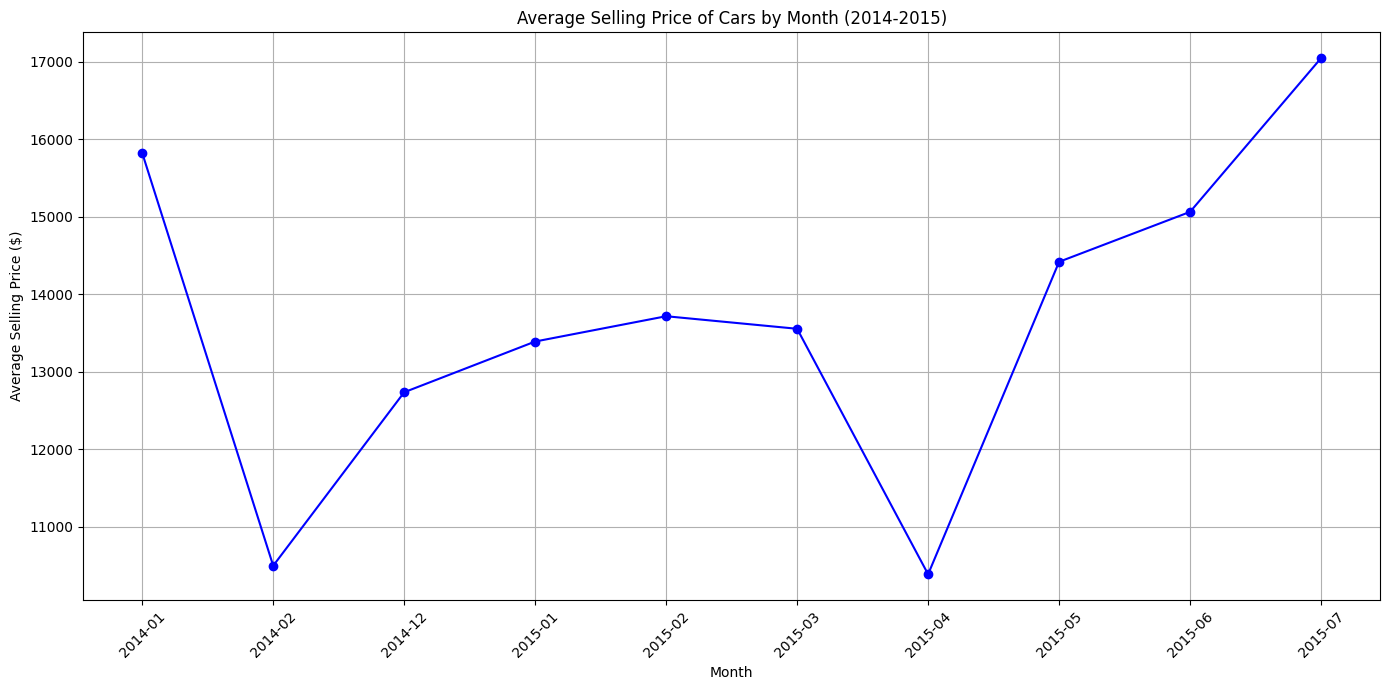

In [50]:
df2['saledate'] = pd.to_datetime(df2['saledate'])
df2['year_month'] = df2['saledate'].dt.to_period('M')
monthly_avg_prices = df2.groupby('year_month')['sellingprice'].mean()

plt.figure(figsize=(14, 7))  
plt.plot(monthly_avg_prices.index.astype(str), monthly_avg_prices.values, marker='o', linestyle='-', color='blue')

plt.title('Average Selling Price of Cars by Month (2014-2015)')  
plt.xlabel('Month')  
plt.ylabel('Average Selling Price ($)')  
plt.xticks(rotation=45)  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

## More Ideas
- The relationship between odometer reading and selling price.
- How prices differ on models of the same make.
- What was purchased more? SUV or Sedan?
- Does color have an effect on selling price?
- Which cars depreciated the most based on their MRSP on release? (scraping required)